# EDA: Tendencia musical de las últimas dos décadas según datos de Spotify

Se ha realizado un Exploratory Data Analysis (EDA) para determinar cuál ha sido la tendencia musical de los últimos 20 años teniendo como punto de partida el data set Top Hits Spotify 2000-2019, adquirido de Kaggle y proporcionado por el usuario Mark Koverha.

El objetivo final del EDA es, además de entender el cambio de tendencias en el Top Spotify en los últimos años, y por ende, hacernos una idea de los gustos y modas a nivel mundial, poder sacar conclusiones sobre qué hace que una canción sea un “hit” y poder predecir futuros hit en siguientes fases del proyecto, o en vez de predecir, producir un hit.


## Extracción y limpieza de datos:

Importamos las librerías que vamos a utilizar

In [31]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Abrimos el dataset descargado desde https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

In [32]:
spot = pd.read_csv("songs_normalize.csv")
spot.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Realizamos una limpieza:
- Quitar las columnas que no necesitamos.
- Seleccionar las fechas que nos interesan.
- Cambiar nomenclatura de columnas Key y Mode.


In [33]:
#Quitamos columnas que no necesitamos:

spot.drop(["explicit", "popularity"], axis=1)
spot.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [34]:
#Limpiamos el df, queremos canciones lanzadas entre el 2000 y 2020, algunas nos sobran

start_date = 1999
end_date = 2021

mask = (spot["year"] > start_date) & (spot["year"] <= end_date)
spot00 = spot.loc[mask]
spot00.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock"


In [35]:
#Cambiar numero claves por escala musical Do Re Mi etc

spot00["key"].replace({0:"Do",
1:"Do#",
2:"Re",
3:"Re#",
4:"Mi",
5:"Fa",
6:"Fa#",
7:"Sol",
8:"Sol#",
9:"La",
10:"La#",
11:"Si"}, inplace=True)


#Cambiar numero tonalidad por mayor y menor

spot00["mode"].replace({0:"Menor",
1:"Mayor"}, inplace=True)
spot00.head()

c:\Users\aitor\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,Do#,-5.444,Menor,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,Do,-4.063,Menor,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,Sol#,-4.806,Menor,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,Fa,-4.244,Menor,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,Sol,-4.264,Mayor,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock"


## Análisis:

### Análisis temporal: años y duración de la canción

Sacamos datos anuales para ver progresión:

In [36]:
#Media tiempo por año.

spot00.groupby(["year"])["duration_ms"].mean()

# Redondeando las medias
spot00.groupby(["year"])["duration_ms"].mean().round()

# Media tiempo por año, de menos a más tiempo
spot00.groupby(["year"])["duration_ms"].mean().round().sort_values(ascending=False)

year
2002    253549.0
2000    249993.0
2001    242450.0
2006    238148.0
2005    236514.0
2003    236335.0
2009    236082.0
2008    235675.0
2004    234040.0
2007    231750.0
2013    230661.0
2011    228740.0
2012    224045.0
2010    220805.0
2014    220578.0
2016    220020.0
2015    218381.0
2020    217396.0
2017    212327.0
2018    209555.0
2019    196729.0
Name: duration_ms, dtype: float64

Creamos nuevo DataFrame para añadir esos datos. Aprovechamos para ponerlo más vistoso.

In [37]:
#anyos_ms = años milisegundos. Sacamos la media anual en ms.

anyos_ms = pd.DataFrame(spot00.groupby(["year"])["duration_ms"].mean().round())
anyos_ms.transpose()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
duration_ms,249993.0,242450.0,253549.0,236335.0,234040.0,236514.0,238148.0,231750.0,235675.0,236082.0,...,228740.0,224045.0,230661.0,220578.0,218381.0,220020.0,212327.0,209555.0,196729.0,217396.0


Convertimos los milisegundos en minutos y segundos para mayor comprensión:

In [38]:
anyos_mins = pd.DataFrame(spot00.groupby(["year"])["duration_ms"].mean().round())
anyos_mins

anyos_mins["duration_ms"] = pd.to_datetime(anyos_mins["duration_ms"], unit="ms").dt.strftime("%M:%S.%f").str[:-7] 
# spot00.dtypes
anyos_mins.dtypes
anyos_mins

anyos_mins.transpose()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
duration_ms,04:09,04:02,04:13,03:56,03:54,03:56,03:58,03:51,03:55,03:56,...,03:48,03:44,03:50,03:40,03:38,03:40,03:32,03:29,03:16,03:37


Obtenemos la duración más corta, larga y media.

In [39]:
minimo=anyos_mins.min()
print(minimo)
maximo=anyos_mins.max()
print(maximo)

# Para sacar la media
sec=anyos_ms.mean()/1000
min=sec//60
seg=sec%60
print ("%d:%d" % (min,seg))

duration_ms    03:16
dtype: object
duration_ms    04:13
dtype: object
3:48


Gráfico en barras para ver la duración media a lo largo de los años y observar tendencias.

<AxesSubplot:xlabel='year'>

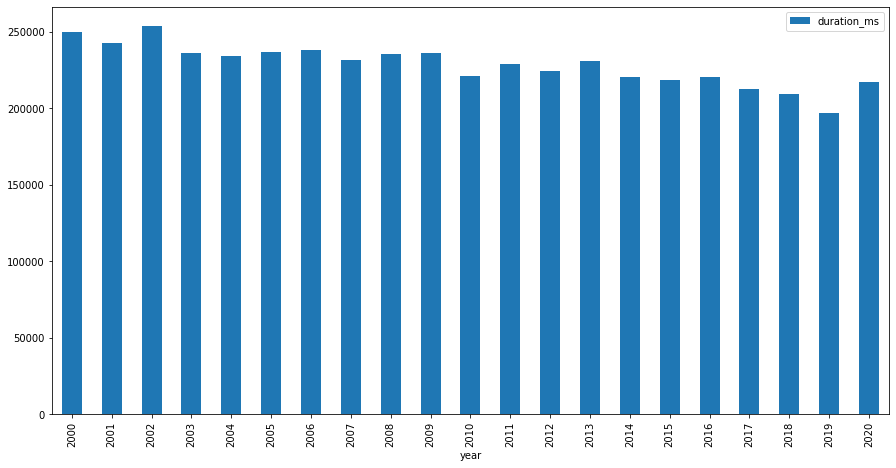

In [40]:
anyos_ms.plot.bar(figsize=(15,7.5))

### Análisis según características Spotify

DF con key y mode:

In [42]:
clave_tono = spot00.drop(spot00.columns.difference(["key","mode"]), 1)
clave_tono

c:\Users\aitor\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,key,mode
0,Do#,Menor
3,Do,Menor
4,Sol#,Menor
6,Fa,Menor
7,Sol,Mayor
...,...,...
1995,Do#,Menor
1996,La,Mayor
1997,La,Mayor
1998,Sol#,Mayor


Limpieza DF clave_tono

In [44]:
clave_tono=pd.DataFrame(clave_tono.value_counts().reset_index().values)
clave_tono

clave_tono.rename(columns={0:"key",
1:"mode",
2:"clave_tono_total"}, inplace=True)
clave_tono

,key,mode,clave_tono_total
0,Do#,Mayor,168
1,Sol,Mayor,139
2,Si,Menor,129
3,Do,Mayor,128
4,Re,Mayor,123
5,Fa,Menor,113
6,Sol#,Mayor,112
7,Do#,Menor,92
8,La,Mayor,84
9,Fa#,Menor,79


Separamos Mayor y Menor en dos columnas con los totales.

In [45]:
clave_tono_mm = spot00.groupby(["key","mode"]).size().unstack(fill_value = 0).reset_index()


clave_tono_mm ["Total"]= clave_tono_mm ["Mayor"]+clave_tono_mm ["Menor"]

clave_tono_mm

mode,key,Mayor,Menor,Total
0,Do,128,65,193
1,Do#,168,92,260
2,Fa,67,113,180
3,Fa#,73,79,152
4,La,84,71,155
5,La#,49,75,124
6,Mi,48,76,124
7,Re,123,32,155
8,Re#,27,31,58
9,Si,67,129,196


Gráfica en barras para ver qué clave y tonalidad se usa más.

<AxesSubplot:xlabel='key'>

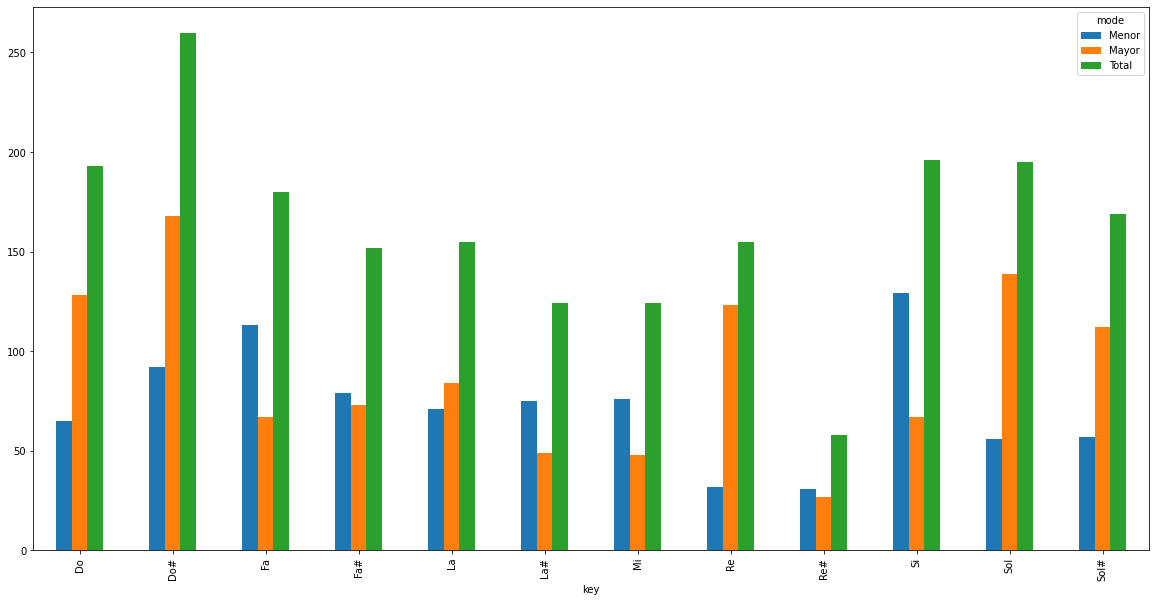

In [46]:
clave_tono_mm.plot(x="key", y=["Menor", "Mayor", "Total"], kind="bar", figsize=(20,10))

Qué tonalidad se usa más

In [47]:
may_tot=clave_tono_mm.Mayor.sum()
print(may_tot)
min_tot=clave_tono_mm.Menor.sum()
print(min_tot)

1085
876


(-1.1271711096686383,
 1.112032462414541,
 -1.1099849352757654,
 1.1004754731083697)

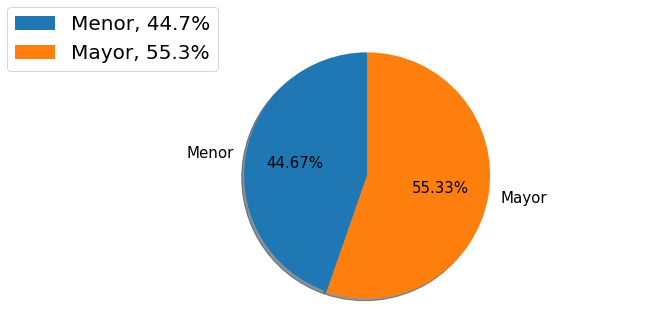

In [50]:
labels= ["Menor","Mayor"]
sizes = (min_tot, may_tot)

fig1, ax1 = plt.subplots( figsize=(10,5))
ax1.pie(sizes, labels=labels, textprops={'fontsize': 15}, autopct='%1.2f%%',
        shadow=True, startangle=90)

#esto es para poner la leyenda, sino se ve mal las letras por el fondo en negro
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / (sum(sizes))) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 20},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

ax1.axis('equal')

### Análisis de géneros más escuchados

Creamos nuevo DF para los géneros musicales

In [51]:
generos = pd.DataFrame(spot00["genre"].value_counts().rename_axis("genero").reset_index(name="Total"))
generos.head(10).sort_values(by="Total", ascending=False)

,genero,Total
0,pop,417
1,"hip hop, pop",276
2,"hip hop, pop, R&B",240
3,"pop, Dance/Electronic",219
4,"pop, R&B",173
5,hip hop,121
6,"hip hop, pop, Dance/Electronic",78
7,rock,57
8,"rock, pop",41
9,Dance/Electronic,40


(-1.1009101799851413,
 1.1030251039749617,
 -1.1084124499786727,
 1.100400594401354)

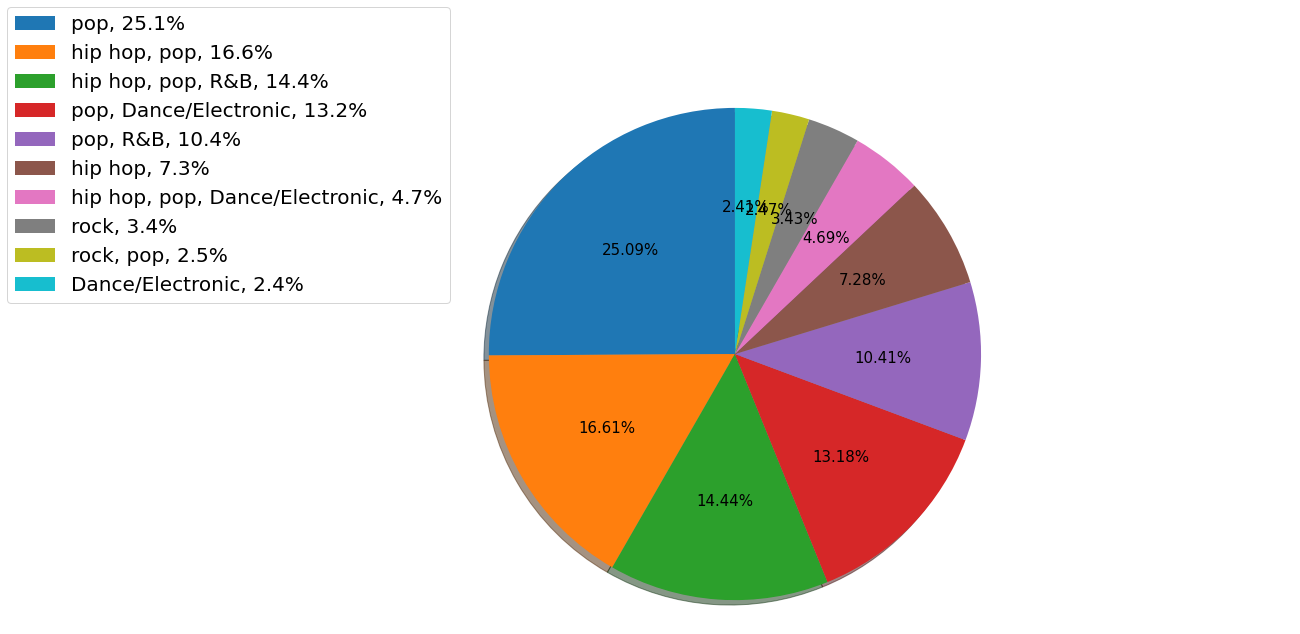

In [52]:
labels= generos["genero"].head(10)
sizes = generos["Total"].head(10)

fig1, ax1 = plt.subplots( figsize=(20,10))
ax1.pie(sizes, textprops={'fontsize': 15}, autopct='%1.2f%%', #añadir labels=labels detrás de sizez, para que aparezcan en el gráfico los nombres
        shadow=True, startangle=90)
#esto es para poner la leyenda
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / (sum(sizes))) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 20},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

ax1.axis('equal')  

### Correlación entre las características (medidas) de Spotify

Nuevo DF para medidas.

In [53]:
medidas=spot00.drop(["artist", "song", "duration_ms", "explicit", "year", "popularity", "key", "mode", "tempo", "genre"],axis=1)
medidas

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0.751,0.834,-5.444,0.0437,0.3000,0.000018,0.3550,0.894
3,0.551,0.913,-4.063,0.0466,0.0263,0.000013,0.3470,0.544
4,0.614,0.928,-4.806,0.0516,0.0408,0.001040,0.0845,0.879
6,0.949,0.661,-4.244,0.0572,0.0302,0.000000,0.0454,0.760
7,0.708,0.772,-4.264,0.0322,0.0267,0.000000,0.4670,0.861
...,...,...,...,...,...,...,...,...
1995,0.842,0.734,-5.065,0.0588,0.0427,0.000000,0.1060,0.952
1996,0.552,0.702,-5.707,0.1570,0.1170,0.000021,0.1050,0.564
1997,0.847,0.678,-8.635,0.1090,0.0669,0.000000,0.2740,0.811
1998,0.741,0.520,-7.513,0.0656,0.4500,0.000002,0.2220,0.347


Mapa de calor con correlaciones entre medidas que nos interesan, global.

In [54]:
f = plt.figure(figsize=(10, 10))
corr_tot = medidas.corr()

corr_tot.style.background_gradient(cmap='coolwarm')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
danceability,1.000000,-0.108289,-0.036767,0.144287,-0.066097,0.022460,-0.123235,0.399328
energy,-0.108289,1.000000,0.654141,-0.058530,-0.444048,0.035678,0.153071,0.332772
loudness,-0.036767,0.654141,1.000000,-0.082725,-0.309823,-0.103736,0.104099,0.236078
speechiness,0.144287,-0.058530,-0.082725,1.000000,0.001260,-0.063182,0.059650,0.075088
acousticness,-0.066097,-0.444048,-0.309823,0.001260,1.000000,-0.004326,-0.109464,-0.128916
instrumentalness,0.022460,0.035678,-0.103736,-0.063182,-0.004326,1.000000,-0.040371,-0.018708
liveness,-0.123235,0.153071,0.104099,0.059650,-0.109464,-0.040371,1.000000,0.018475
valence,0.399328,0.332772,0.236078,0.075088,-0.128916,-0.018708,0.018475,1.000000


<Figure size 720x720 with 0 Axes>

Lo mismo para el top 10 géneros, para ello primero preparamos el DF una vez más.

In [56]:
generos.sort_values(by="genero", ascending=True)
# para grafica de abajo

gen_df=generos.sort_values(by="genero", ascending=True)
gen_df=gen_df.rename(columns={"genero":"genre"})
gen_df["Total"].values

array([ 40,   2,   1,   1,  13,   1,   2,   1,   2,   2,   2,  10,   1,
         1, 121,  16,   3,   1,   1, 276,  78, 240,   3,   3,   1,  14,
         9,   2,  15,   9, 417, 219,   8, 173,   6,   1,   7,   1,   2,
        26,  26,  13,   2,  12,  57,   1,   1,   1,   2,   1,   1,   1,
        37,  41,   8,   4,   1,  21], dtype=int64)

Para quedarnos con las medidas del top 10, quitamos lo que nos interesa
del dataframe original, lo agrupamos por género concatenando a las medidas
que nos interesa.

Añadimos el total de cada género a modo de que coincidan con su valor correspondiente
en el nuevo DF y así podremos ordenador de mayor a menor y quedarnos con los 10 primeros.

In [57]:
medgen=spot00.drop(["artist", "song", "popularity", "duration_ms", "explicit", "year", "key", "mode", "tempo"],axis=1)

medgen=medgen.set_index("genre").reset_index()
medgen=medgen.groupby("genre")["danceability",	"energy","loudness",	"speechiness",
	"acousticness",	"instrumentalness",	"liveness",	"valence"].mean().reset_index()
medgen['Total'] = gen_df['Total'].values

medgen_top10=medgen.sort_values(by="Total", ascending=False).head(10)
medgen_top10

c:\Users\aitor\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,Total
30,pop,0.647050,0.715067,-5.536600,0.074186,0.151201,0.006896,0.170526,0.553001,417
19,"hip hop, pop",0.734913,0.697862,-5.531924,0.171021,0.099421,0.002152,0.196105,0.556076,276
21,"hip hop, pop, R&B",0.710779,0.663483,-6.019175,0.127548,0.129462,0.004996,0.166658,0.575594,240
31,"pop, Dance/Electronic",0.655242,0.760333,-5.184644,0.073488,0.115229,0.034836,0.183670,0.531360,219
33,"pop, R&B",0.656740,0.660584,-5.690272,0.096569,0.179640,0.008484,0.161099,0.532642,173
14,hip hop,0.719248,0.679975,-5.884587,0.201944,0.140845,0.009275,0.204671,0.527129,121
20,"hip hop, pop, Dance/Electronic",0.667782,0.815192,-4.121372,0.088645,0.088469,0.017293,0.209542,0.542827,78
44,rock,0.527404,0.809579,-4.691947,0.064833,0.049092,0.050594,0.197619,0.519877,57
53,"rock, pop",0.537073,0.755098,-5.523732,0.048180,0.090214,0.012786,0.210495,0.507073,41
0,Dance/Electronic,0.681525,0.770675,-5.977500,0.059955,0.068651,0.106024,0.178965,0.512650,40


Correlación top 10

In [58]:
f = plt.figure(figsize=(10, 10))
corr_top = medgen_top10.corr()

corr_top.style.background_gradient(cmap='coolwarm')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,Total
danceability,1.000000,-0.559483,-0.393690,0.724511,0.425983,-0.176803,-0.278883,0.596272,0.412478
energy,-0.559483,1.000000,0.762230,-0.613102,-0.809893,0.537115,0.543229,-0.488801,-0.522221
loudness,-0.393690,0.762230,1.000000,-0.315056,-0.437317,-0.026130,0.506879,-0.094330,-0.246786
speechiness,0.724511,-0.613102,-0.315056,1.000000,0.359582,-0.472338,0.115067,0.435873,0.243394
acousticness,0.425983,-0.809893,-0.437317,0.359582,1.000000,-0.606204,-0.569775,0.407468,0.593528
instrumentalness,-0.176803,0.537115,-0.026130,-0.472338,-0.606204,1.000000,-0.043396,-0.555558,-0.511341
liveness,-0.278883,0.543229,0.506879,0.115067,-0.569775,-0.043396,1.000000,-0.420346,-0.537264
valence,0.596272,-0.488801,-0.094330,0.435873,0.407468,-0.555558,-0.420346,1.000000,0.732588
Total,0.412478,-0.522221,-0.246786,0.243394,0.593528,-0.511341,-0.537264,0.732588,1.000000


<Figure size 720x720 with 0 Axes>

Correlación total.

In [59]:
f = plt.figure(figsize=(8, 8))
corr_top = spot.corr()

corr_top.style.background_gradient(cmap='coolwarm')

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418
energy,-0.078763,-0.162462,-0.108644,-0.014021,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719
key,-0.002560,0.003320,0.007380,0.014823,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431
loudness,-0.079912,-0.089829,0.017479,0.030632,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709
mode,-0.003848,0.049576,-0.007358,-0.021353,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434
speechiness,0.066998,0.417343,0.001111,0.021162,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747


<Figure size 576x576 with 0 Axes>

### Relación entre las características (medidas) y el top 10 géneros

Primero preparamos el terreno

In [60]:
# Esto para meterlo en un for que nos cogerá solo los géneros que nos interesan (los que salen de aquí)
gen_validos = generos.genero.head(10).values
gen_validos

array(['pop', 'hip hop, pop', 'hip hop, pop, R&B',
       'pop, Dance/Electronic', 'pop, R&B', 'hip hop',
       'hip hop, pop, Dance/Electronic', 'rock', 'rock, pop',
       'Dance/Electronic'], dtype=object)

Nuevo DF para la relación entre características y Top 10

In [61]:
medgen_top10.drop(medgen_top10[medgen_top10.genre.isin(["classical", "set()"])].index.values, inplace=True)
medgen_top10=medgen_top10.drop(["Total"],axis=1)

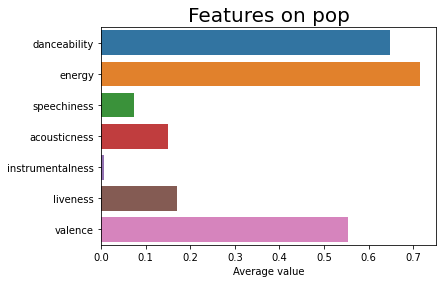

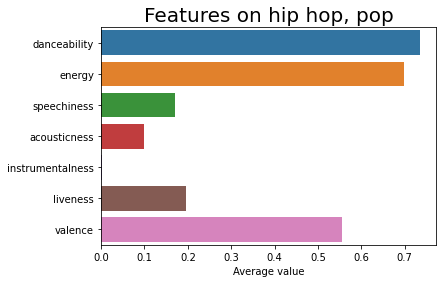

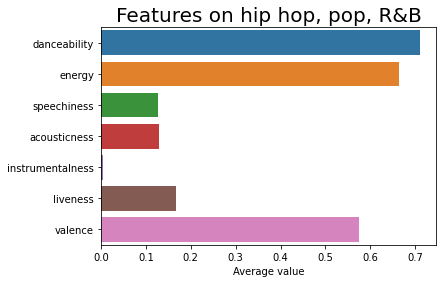

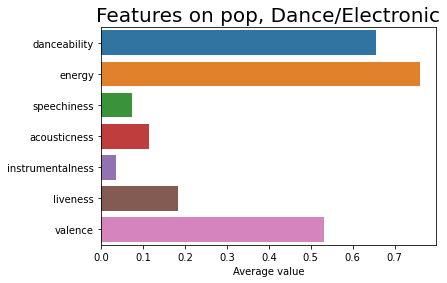

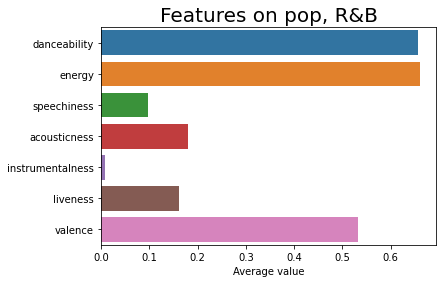

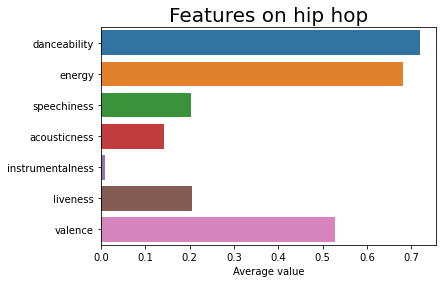

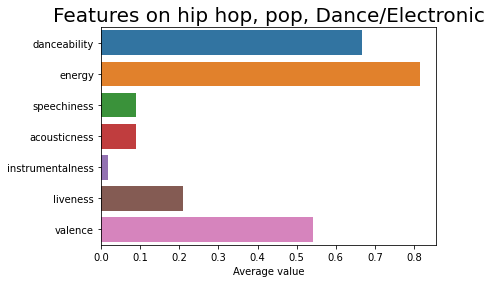

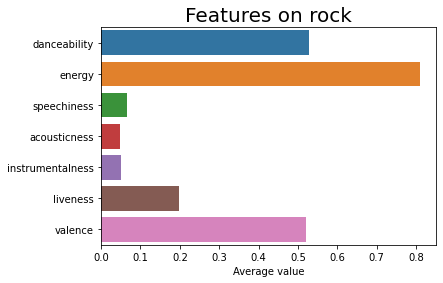

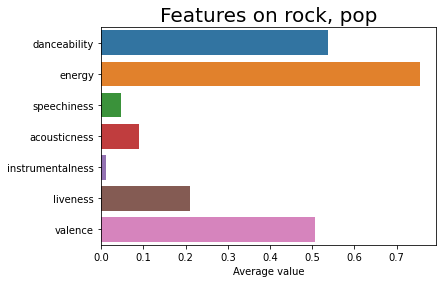

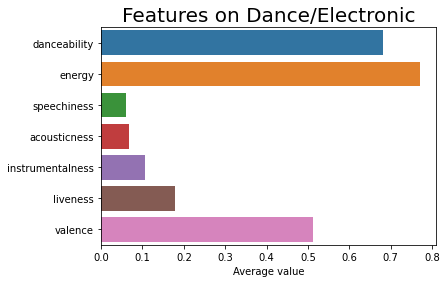

In [62]:
medgen_top10

for genre in gen_validos:
    data = medgen_top10[medgen_top10.genre == genre]
    #Exclude features with different scales
    data = data.drop(["genre", "loudness"], axis=1).transpose().reset_index()
    data.columns = ["feature", "value"]
    plt.clf()
    ax = sns.barplot(x="value", y="feature", data=data)
    ax.set_xlabel("Average value")
    ax.set_ylabel("")
    ax.set_title("Features on " + genre, fontsize=20)
    plt.show()

Bonus malus

### TEMPO

Tempo medio global

In [65]:

temp_tot=spot00.tempo.mean()
temp_tot

120.09240183579807

Tempo medio top 10

In [66]:
temp_top_pre=spot.drop(["artist", "song", "popularity", "duration_ms", "explicit", "year", "key", "mode"],axis=1)
temp_top=temp_top_pre.tempo.mean()
temp_top

120.12255750000001